## TSM with Genetics

### Importing Dependencies

In [1]:
from random import randint as rnd
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Setting Parameters

In [2]:
N_Cities = 10
Width = 500
Height = 500

Population_Size = 100
Epoch = 200

### Random City Generator Function

In [3]:
def random_city_generator(n, w, h):
    offset = 20
    cities = []
    i = 0
    while i < n:
        city_location = [rnd(offset, w-offset), rnd(offset, h-offset)]
        if city_location not in cities:
            cities.append(city_location)
            i+=1
    return cities

### Initial Population Function

In [4]:
def init_population(n, ps):
    population_list = []
    for i in range(ps):
        path = [i for i in range(n)]
        shuffle(path)
        path+=[None]
        population_list.append(path)
    return population_list

### Cross Over Function

In [5]:
def cross_over(population_list, n, ps):
    for i in range(ps):
        new_path = population_list[i][:n] + [None]
        population_list.append(new_path)
    return population_list

### Mutaion function

In [6]:
def mutation(population_list, n, ps):
    length = ps*2
    i = ps
    while i < length:
        cell_1 = rnd(0, n-1)
        cell_2 = rnd(0, n-1)
        if cell_1 != cell_2:
            population_list[i][cell_1], population_list[i][cell_2] = population_list[i][cell_2], population_list[i][cell_1]
            i+=1
    return population_list

### Fitness Function

In [7]:
def path_cordinates(cities_locations, path):
    cordinates = []
    for i in path:
        cordinates.append(cities_locations[i])
    return cordinates

def euclidean_distance(path):
    distance = 0
    for i in range(len(path)-1):
        distance += np.sqrt((path[i][0]-path[i+1][0])**2 + (path[i][1]-path[i+1][1])**2)
    return distance
    
def fitness(population_list, n, location_list):
    for i in range(len(population_list)):
        if population_list[i][-1]==None:
            current_path = path_cordinates(location_list, population_list[i][:n]+[population_list[i][0]])
            d = euclidean_distance(current_path)
            population_list[i][n] = d
    return population_list

### Sorter Function

In [8]:
def sorter(population_list, k):
    population_list.sort(key = lambda x: x[k])
    return population_list

### Draw Cities

In [9]:
def draw_cities(img, location_list, color):
    for city in location_list:
        img = cv2.circle(img, city, 6, color, -1)
    return img

### Draw Path

In [10]:
def draw_path(img, path, color):
    for i in range(len(path)-1):
        img = cv2.line(img, path[i], path[i+1], color, 2)
    return img

### Main

Best found solution:  [0, 7, 4, 2, 1, 3, 6, 5, 8, 9, np.float64(1380.941925472972)]


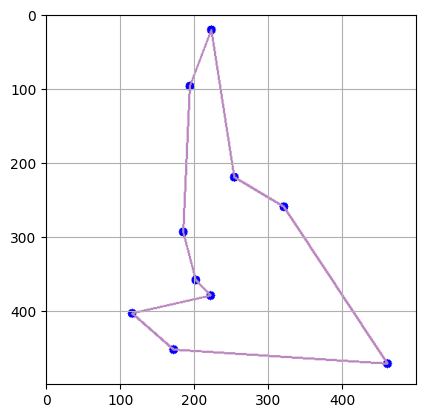

In [11]:
if __name__ == "__main__":
    cities_locations = random_city_generator(N_Cities, Width, Height)
    current_population = init_population(N_Cities, Population_Size)

    for i in range(1, Epoch+1):
        current_population = cross_over(current_population, N_Cities, Population_Size)
        current_population = mutation(current_population, N_Cities, Population_Size)
        current_population = fitness(current_population, N_Cities, cities_locations)
        current_population = sorter(current_population, N_Cities)
        current_population = current_population[:Population_Size]
        # print("Best Path and Distance so far: ", current_population[0])
    else:
        print("Best found solution: ", current_population[0])
        area = np.full((Width, Height, 3), 255, np.int16)
        area = draw_cities(area, cities_locations, (0,0,255))
        current_path = path_cordinates(cities_locations, current_population[0][:N_Cities])
        current_path += [current_path[0]]
        area = draw_path(area, current_path, (187,134,192))
        plt.imshow(area)
        plt.grid()
        plt.show()